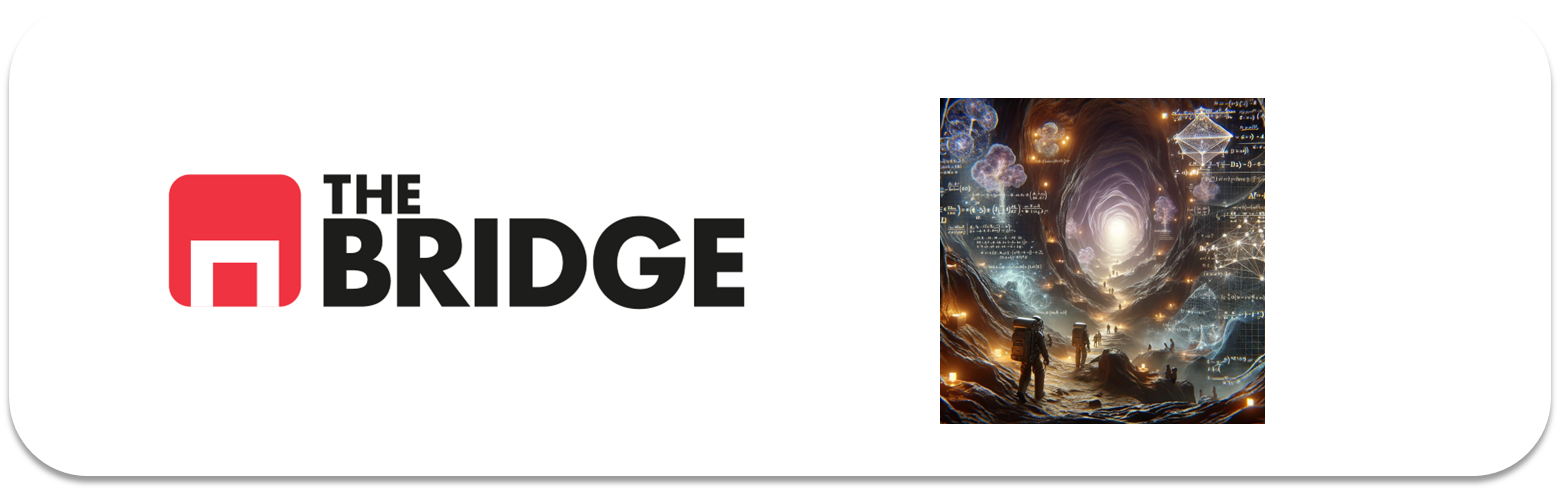

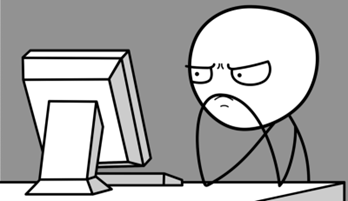

Para ejercitarte y afianzar lo aprendido sobre **Keras y DL**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Predecir eficiencia de gasolina

En este conjuntos de ejercicios vamos a trabajar sobre el set de datos clasico [Auto MPG](https://archive.ics.uci.edu/ml/datasets/auto+mpg) para construir un modelo DL para predecir el consumo de vehiculos de 1970 y 1980. Para hacer esto proveeremos el modelo con una descripcion de muchos automoviles de ese periodo. Esta descripcion incluye atributos como: Cilindros, desplazamiento, potencia y peso.

El objetivo de este ejercicio es predecir el target miles per galon (MPG), que vendría a representar las millas por galón de combustible.

Para la construcción del modelo vamos a utilizar Keras.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

### Ejercicio 1

Carga los datos en un dataframe, utilizando como nombre de columnas los siguientes:

```python
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight', 'Acceleration', 'Model Year', 'Origin']
``` 


In [2]:
data = []
with open("./data/Autos_data.txt") as f:
    for line in f:
        parts = line.strip().split()
        name = ' '.join(parts[8:]).strip('"')
        car = {
            "mpg": float(parts[0]),
            "cylinders": int(parts[1]),
            "displacement": float(parts[2]),
            "horsepower": parts[3],
            "weight": float(parts[4]),
            "acceleration": float(parts[5]),
            "model_year": int(parts[6]),
            "origin": int(parts[7]),
            "name": name
        }
        data.append(car)

In [3]:
df = pd.DataFrame.from_dict(data)
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [4]:
target = "mpg"
df = df.drop(columns="name")

### Ejercicio 2: Limpieza inicial

Echa un primer vistazo. Limpia columnas "raras". Deshazte de nulos (cuidado aquí), arregla el tipo de las features numéricas si fuera necesario. Haz una lista de las features categóricas que tuvieramos que convertir posteriormente. (Es antes del split pero no importa para este ejercicio)

In [5]:
cat_features = ['cylinders','origin','model_year']
num_features = [col for col in df if col not in cat_features and col != target]

In [6]:
"""Cambio del tipo de feature"""
df["weight"] = df["weight"].astype("int64")
df["displacement"] = df["displacement"].astype("int64")

df["horsepower"] = df["horsepower"].replace('?', np.nan)
df["horsepower"] = pd.to_numeric(df["horsepower"])
df = df.dropna(subset=["horsepower"])
df["horsepower"] = df["horsepower"].astype(float)

### Ejercicio 3

Antes de seguir nos informan que las etiquetas de "origin" correspoden a  USA para el 1, Europa para el 2 y Japón para el 3. Convierte origin a esos valores porque queremos tener el literal. Luego haz directamente un one-hot encoding de esas variable.  

*NOTA: Realmente los one-hot-encoding se pueden hacer contra el dataset original desde el principio (no afectan unos a otros), si nos los hacemos es porque hasta que no se han analizado las variables puede que no tengamos claro que queremos hacer si una codificación ordinal, una vectorización (onehot) o bien queremos hacer otro cambio en la variable y esos vienen dados por la relación de la categórica con el target y por tanto sólo se pueden ver en el train. Pero si por lo que sea sabemos seguros que vamos a hacer vectorización no hay problema en hacerlo antes del split. Por otro lado, siempre conviene quedarse con una categoria unkown para valores que pueden llegar en el futuro antes de un recalibrado.*


In [7]:
df["origin"] = df["origin"].map({1: "USA", 2:"EU", 3:"JPN"})
df = pd.get_dummies(data = df, columns= ["origin"], dtype = int)

### Ejercicio 4

Divide los datos en train y test. Ahora divida el set de datos en un set de entrenamiento y otro de pruebas. 80% para entrenamiento

Usaremos el set de pruebas en la evaluacion final de nuestro modelo. Emplea una variable target para guardar el nombre de la columna target.

NOTA: El resultado tienen que ser dos datasets

In [8]:
train_set, test_set = train_test_split(df, train_size=0.8, random_state = 42)

### Ejercicio 5

Inspecciona los datos. Revisa rápidamente la distribución conjunta del dataset de entrenamiento mediante un grid de gráficos

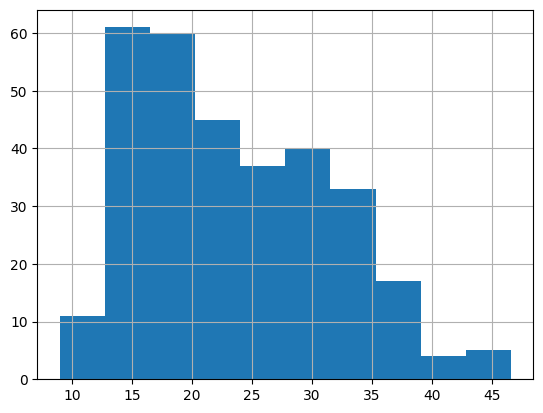

In [9]:
train_set[target].hist();

La features target (mpg) tiene cierta tendencia hacia la derecha. Tampoco es una mala distribución

In [10]:
features = [col for col in df.columns if col != target]

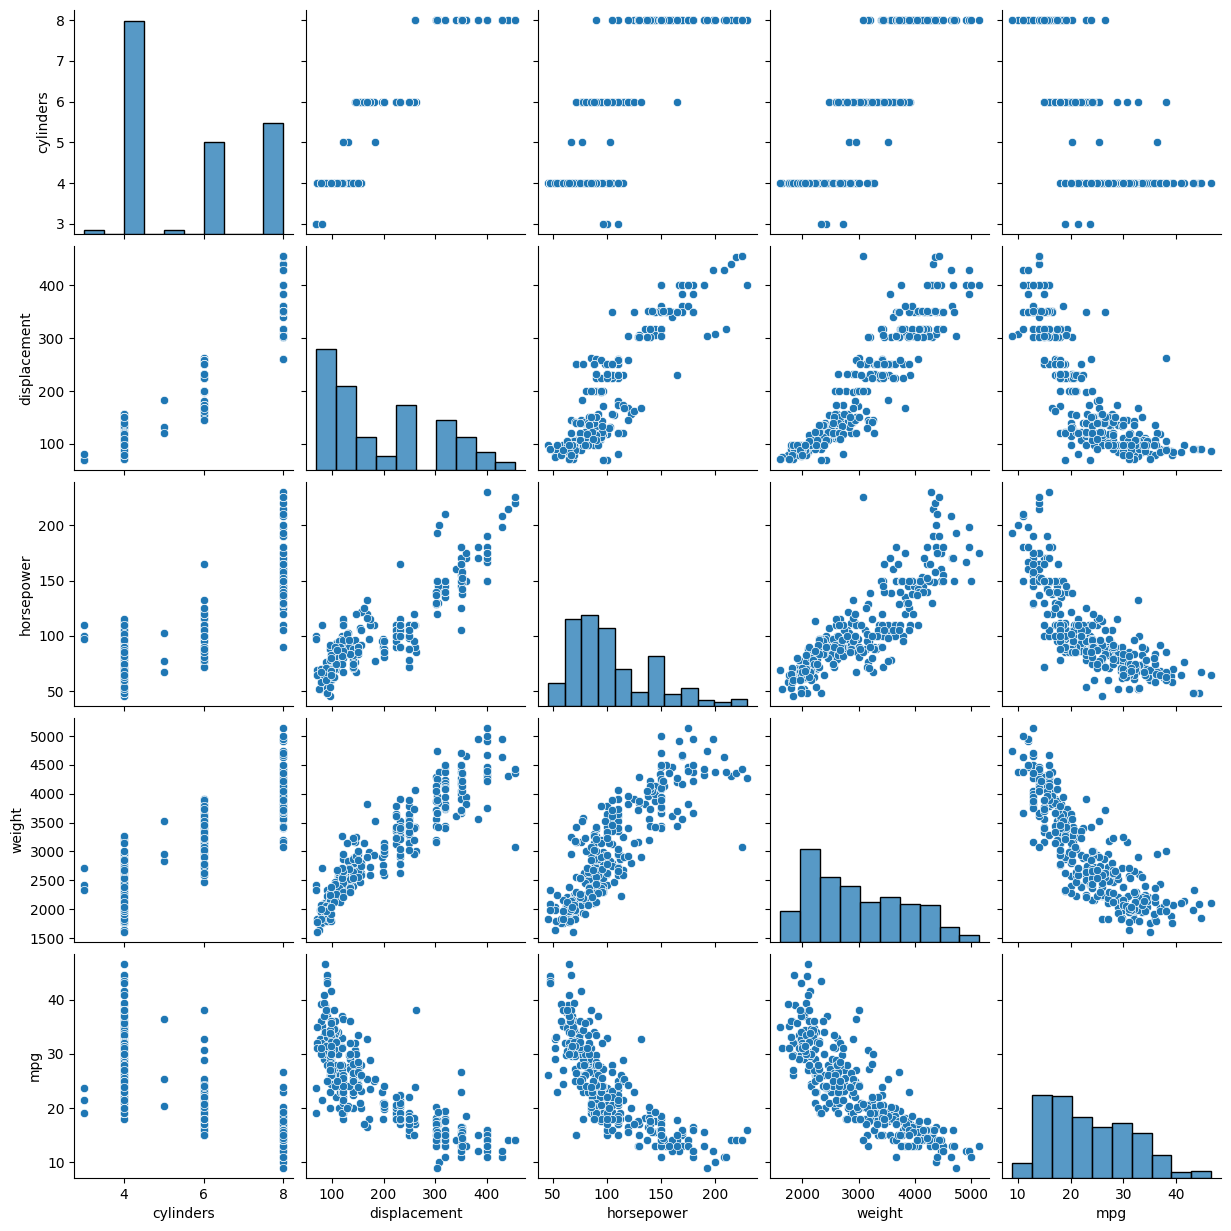

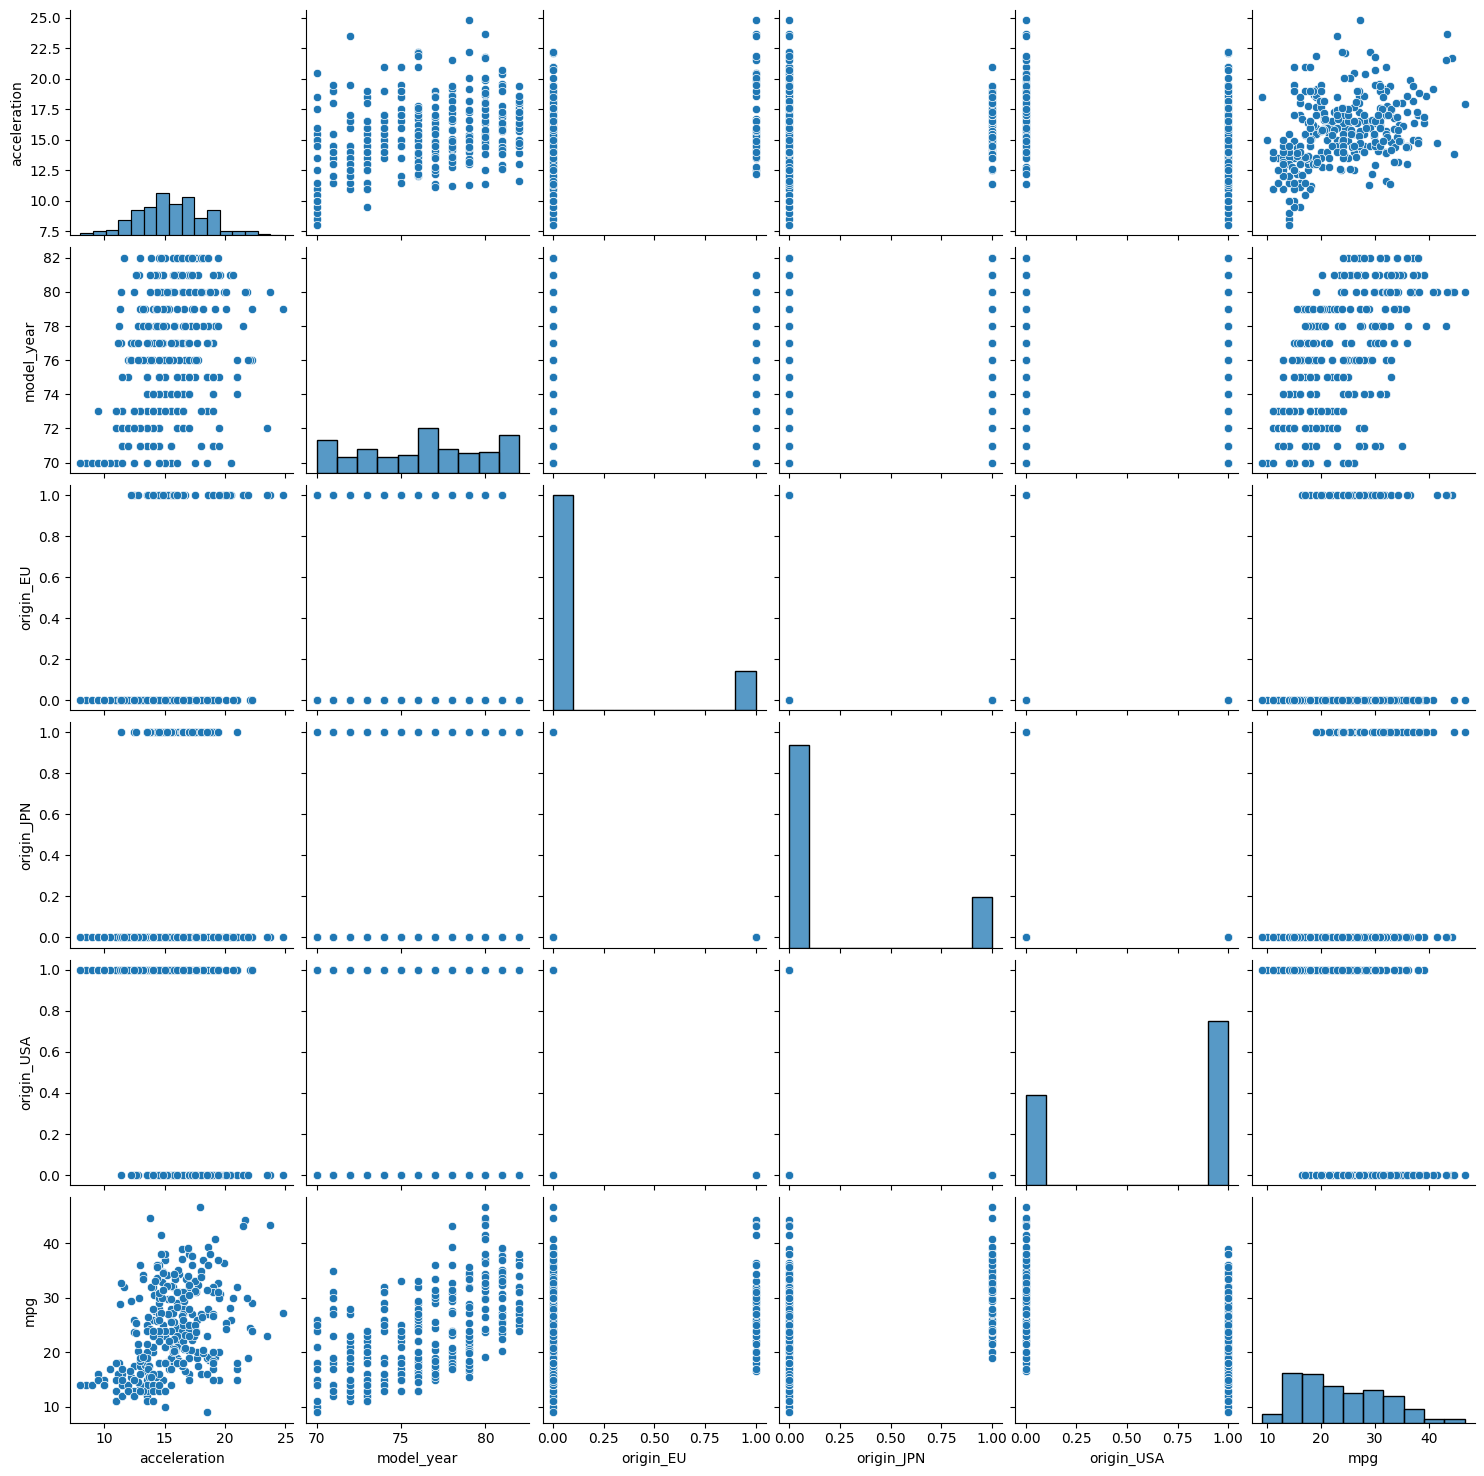

In [11]:
sns.pairplot(data = train_set[features[0:4] + [target]])
sns.pairplot(data = train_set[features[4:9] + [target]]);

Se pueden observar tanto features numéricas, que siguen una distribución en concreto como puede ser mpg y horsepower; y variables categóricas

In [12]:
corr = train_set.corr()
np.abs(corr[target].sort_values(ascending = False))

mpg             1.000000
model_year      0.590454
origin_JPN      0.473004
acceleration    0.412048
origin_EU       0.220038
origin_USA      0.562162
cylinders       0.780555
horsepower      0.782381
displacement    0.811580
weight          0.835568
Name: mpg, dtype: float64

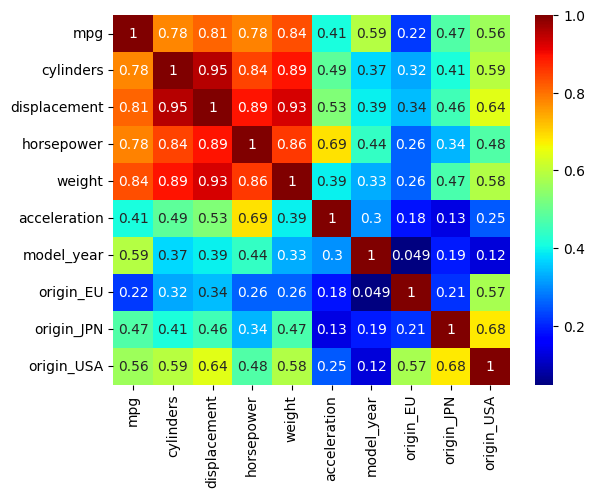

In [13]:
sns.heatmap(data = np.abs(corr), annot=True, cmap='jet');

### Ejercicio 6 

Independientemente de lo que hayas encontrado en el análisis anterior, vamos a utilizar todas las features y antes las vamos a escalar. Estandardiza train y test.

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

train_set[features] = scaler.fit_transform(train_set[features])
test_set[features] = scaler.transform(test_set[features])

## El modelo

### Ejercicio 7: Construye el modelo con Keras

Construyamos nuestro modelo. Aquí, utilizaremos un modelo `secuencial` con dos capas ocultas densamente conectadas y una capa de salida que devuelve un único valor continuo. Es decir una MLP con dos capas ocultas.

Por tanto, tendrá tres capas. Una inicial con activación relu (usa el argumento `input_shape` para darle el número de features). Otra hidden layer con activación relu y la de salida de regresión, que se compondrá de una única neurona. Pon las neuronas que consideres interesantes para las dos primeras capas (NOTA: En este caso partimos de pocas features, por lo que puede ser interesante poner 2 o 3 como mínimo el número de features para poder obtener unas pseudofeatures que intenten capturar las interrelaciones.)

Otros datos:

Para el compile utiliza un loss='mse'.

optimizer = `tf.keras.optimizers.RMSprop(0.001)`

Y en metrics añade en una lista el `mae` y `mse`.

Utiliza una aproximación en prisma (mismo numero de unidades en las capas ocultas)

In [15]:
model = keras.models.Sequential()

model.add(keras.layers.Dense(units = 27,
                             input_shape = [len(features)],
                             activation = 'relu'))

model.add(keras.layers.Dense(units = 27,
                             activation = 'relu'))

model.add(keras.layers.Dense(units = 1))

c:\Users\usuar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.layers

[<Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [17]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(0.001),
              loss = 'mse',
              metrics = ['mse','mae']
              )

### Ejercicio 8

Inspecciona el modelo usando el método `.summary` para imprimir una descripción simple del modelo

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 27)             │           270 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 27)             │           756 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            28 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,054 (4.12 KB)

 Trainable params: 1,054 (4.12 KB)

 Non-trainable params: 0 (0.00 B)

### Ejercicio 9 Entrenar el modelo

Entrena el modelo para 1000 epochs y guarda los resultados del entrenamiento en una variable llamada `history`.
Emplea en el entrenamiento un 20% de los datos para validación, mediante el argumento `validation_split`.

In [19]:
x_train = train_set.drop(columns = target, axis = 1)
y_train = train_set[target]

x_test = test_set.drop(columns = target, axis = 1)
y_test = test_set[target]

In [20]:
history = model.fit(x_train, y_train, 
                    epochs=1000,
                    validation_split = 0.2)

Epoch 1/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 583.8898 - mae: 23.0144 - mse: 583.8898 - val_loss: 670.9860 - val_mae: 24.7457 - val_mse: 670.9860
Epoch 2/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 603.7476 - mae: 23.2501 - mse: 603.7476 - val_loss: 652.6058 - val_mae: 24.4008 - val_mse: 652.6058
Epoch 3/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 556.2953 - mae: 22.3234 - mse: 556.2953 - val_loss: 633.8363 - val_mae: 24.0498 - val_mse: 633.8363
Epoch 4/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 553.6858 - mae: 22.4519 - mse: 553.6858 - val_loss: 613.8989 - val_mae: 23.6672 - val_mse: 613.8989
Epoch 5/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 496.6358 - mae: 21.1527 - mse: 496.6358 - val_loss: 592.4650 - val_mae: 23.2495 - val_mse: 592.4650
Epoch 6/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 519.0329 - mae: 21.5670 - mse: 519.0329 - val_loss: 570.5708 - val_mae: 22.8125 - val_mse: 570.5708
Epoch 7/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/

### Ejercicio 10

Visualiza el progreso de entrenamiento del modelo usando las estadísticas almacenadas en el objeto `history`. Muestra la evolución del error en train y validation por un lado, y la evolución de la pérdida (loss), también train contra validation, en otra.

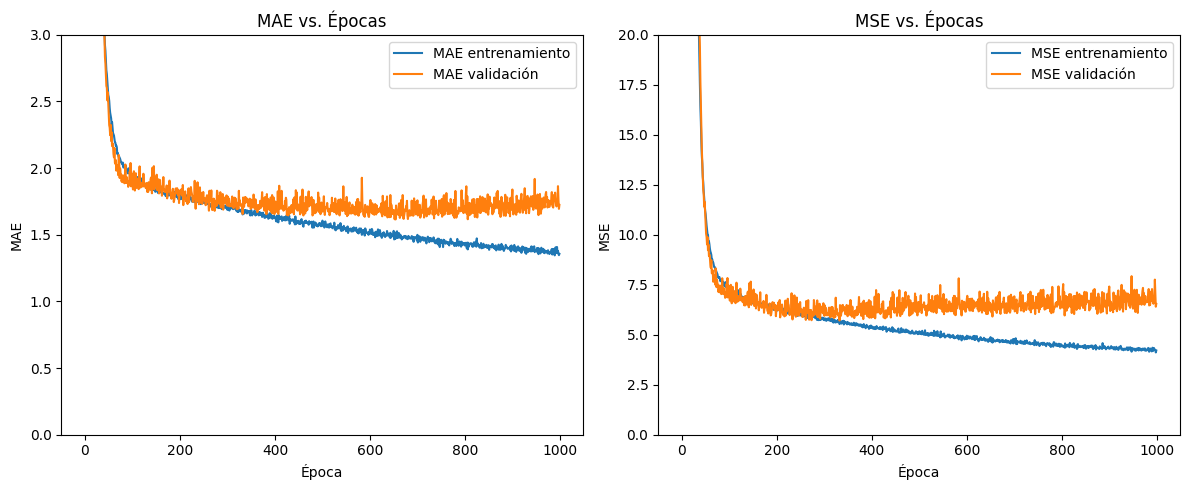

In [21]:
history_df = pd.DataFrame(history.history)

# Crear figura con 2 subplots en una fila
plt.figure(figsize=(12, 5))

# Subplot 1: MAE
plt.subplot(1, 2, 1)
plt.plot(history_df['mae'], label='MAE entrenamiento')
plt.plot(history_df['val_mae'], label='MAE validación')
plt.xlabel('Época')
plt.ylabel('MAE')
plt.title('MAE vs. Épocas')
plt.legend()
plt.ylim(0,3)

# Subplot 2: MSE
plt.subplot(1, 2, 2)
plt.plot(history_df['mse'], label='MSE entrenamiento')
plt.plot(history_df['val_mse'], label='MSE validación')
plt.xlabel('Época')
plt.ylabel('MSE')
plt.title('MSE vs. Épocas')
plt.legend()
plt.ylim(0,20)

plt.tight_layout()
plt.show()

In [22]:
history_df

,loss,mae,mse,val_loss,val_mae,val_mse
0,604.256897,23.315578,604.256897,670.985962,24.745695,670.985962
1,583.805847,22.906839,583.805847,652.605774,24.400810,652.605774
2,566.856567,22.571972,566.856567,633.836304,24.049828,633.836304
3,549.301331,22.219944,549.301331,613.898926,23.667240,613.898926
4,530.525024,21.835369,530.525024,592.465027,23.249527,592.465027
...,...,...,...,...,...,...
995,4.260339,1.362517,4.260339,6.811409,1.736099,6.811409
996,4.257316,1.378140,4.257316,7.758197,1.864740,7.758197
997,4.239311,1.357820,4.239311,7.030127,1.763848,7.030127
998,4.114114,1.347245,4.114114,6.403093,1.694496,6.403093


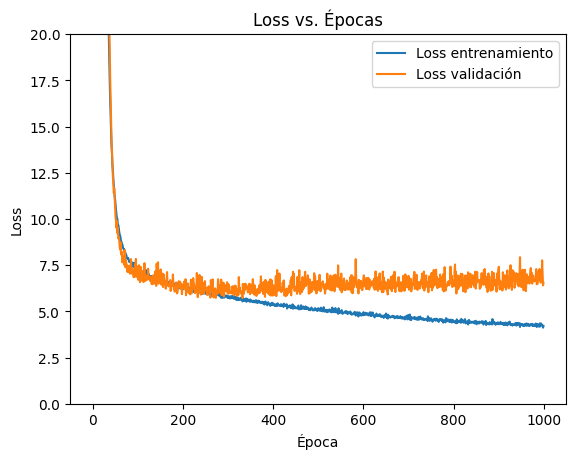

In [23]:
plt.plot(history_df['loss'], label='Loss entrenamiento')
plt.plot(history_df['val_loss'], label='Loss validación')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.title('Loss vs. Épocas')
plt.legend()
plt.ylim(0,20)
plt.show()

### Ejercicio 11

Comenta las gráficas anteriores.

Este modelo no obtiene mucha mejora. La diferencia de tanto de error como de pérdida comienza a partir del epoch 400. En las primeras épocas el set de validación obtiene mejores resultados pero a partir de 400 el train set tiene menor pérdida y menor error.

### Ejercicio 12

Independientemente de lo comentado en 11, vamos a añadir un callback al entrenamiento. Para ello, construye el modelo otra vez y vuelve a compilarlo (si no lo haces, como ya sabes comenzará el entrenamiento donde lo dejó y no nos valdrá el callback para nada). Entrena el modelo con los mismos hiperparámetros del ejercicio 10 y pinta la gráfica de evolución de los errores e interprétalo (obten el MAE medio una vez "estabilizado" el entrenamiento).  

Para el earlystopping utiliza un margen de 20 epochs.

In [24]:
model = keras.models.Sequential()

model.add(keras.layers.Dense(units = 27,
                             input_shape = [len(features)],
                             activation = 'relu'))
model.add(keras.layers.Dense(units = 27,
                             activation = 'relu'))
model.add(keras.layers.Dense(units = 1))

model.compile(optimizer=tf.keras.optimizers.RMSprop(0.001),
              loss = 'mse',
              metrics = ['mse','mae']
              )

early_stopping = keras.callbacks.EarlyStopping(patience=20, monitor = 'val_loss')

history = model.fit(x_train, y_train,
                    epochs = 1000,
                    validation_split = 0.2,
                    callbacks = early_stopping )

Epoch 1/1000


c:\Users\usuar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 592.8774 - mae: 23.0153 - mse: 592.8774 - val_loss: 624.5844 - val_mae: 23.8657 - val_mse: 624.5844
Epoch 2/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 504.4379 - mae: 21.2697 - mse: 504.4379 - val_loss: 598.9890 - val_mae: 23.3667 - val_mse: 598.9890
Epoch 3/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 515.6813 - mae: 21.5487 - mse: 515.6813 - val_loss: 572.3281 - val_mae: 22.8366 - val_mse: 572.3281
Epoch 4/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 502.9410 - mae: 21.2681 - mse: 502.9410 - val_loss: 543.0719 - val_mae: 22.2437 - val_mse: 543.0719
Epoch 5/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 438.8591 - mae: 19.8369 - mse: 438.8591 - val_loss: 511.0247 - val_mae: 21.5750 - val_mse: 511.0247
Epoch 6/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 453.5127 - mae: 20.2118 - mse: 453.5127 - val_loss: 478.9721 - val_mae: 20.8772 - val_mse: 478.9721
Epoch 7/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 

Interpreta el gráfico

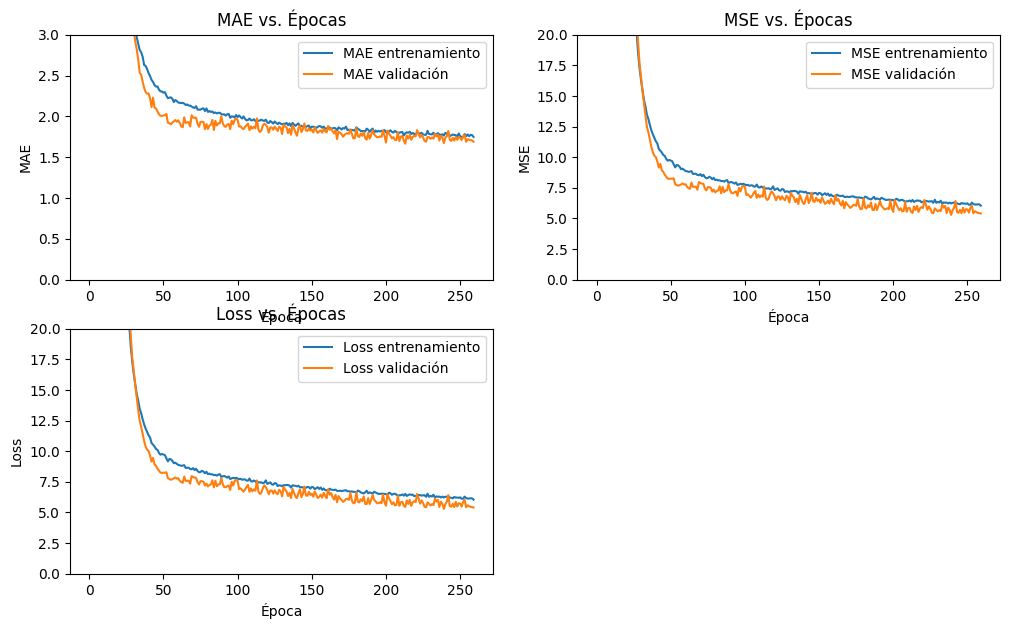

In [ ]:
history_df = pd.DataFrame(history.history)

# Crear figura con 2 subplots en una fila
plt.figure(figsize=(12, 7))

# Subplot 1: MAE
plt.subplot(2, 2, 1)
plt.plot(history_df['mae'], label='MAE entrenamiento')
plt.plot(history_df['val_mae'], label='MAE validación')
plt.xlabel('Época')
plt.ylabel('MAE')
plt.title('MAE vs. Épocas')
plt.legend()
plt.ylim(0,3)

# Subplot 2: MSE
plt.subplot(2, 2, 2)
plt.plot(history_df['mse'], label='MSE entrenamiento')
plt.plot(history_df['val_mse'], label='MSE validación')
plt.xlabel('Época')
plt.ylabel('MSE')
plt.title('MSE vs. Épocas')
plt.legend()
plt.ylim(0,20)

# Subplot 3: Loss
plt.subplot(2, 2, 3)
plt.plot(history_df['loss'], label='Loss entrenamiento')
plt.plot(history_df['val_loss'], label='Loss validación')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.title('Loss vs. Épocas')
plt.legend()
plt.ylim(0,20)
plt.show()


### Ejercicio 13

Veamos qué tan bien generaliza el modelo al usar el conjunto de **test**. Esto nos dice qué tan bien podemos esperar que el modelo prediga cuándo lo usamos en el mundo real. Utiliza el método `evaluate` con los datos de test normalizados y sus labels.

Con el método evaluate devolverá tres valores: loss, mae y mse.

In [26]:
loss, mae, mse = model.evaluate(x_test, y_test)
print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5.7291 - mae: 1.7268 - mse: 5.7291
Testing set Mean Abs Error:  6.28 MPG


In [27]:
print("MAPE promedio:", (mae / y_test.mean()) * 100)

MAPE promedio: 27.51071584448028


### Ejercicio 14

Dibuja en un scatter plot las predicciones de test vs sus true labels.

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


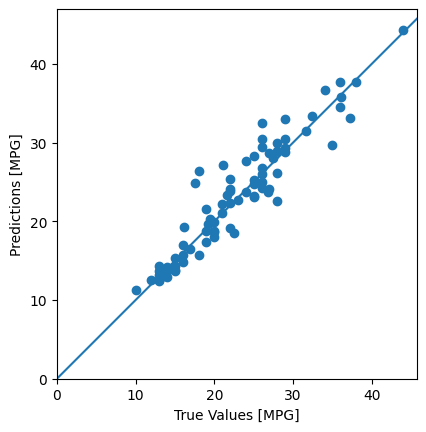

In [35]:
y_pred = model.predict(x_test).flatten()

plt.scatter(y_test, y_pred)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])